# Weather sentiment dataset analysis

## Data Collection and Augmentation

We collected about 1000 tweets from a dataset available on [data.world](https://data.world/crowdflower/weather-sentiment-evaluated), which contains sentiment labeled tweets about the weather with sentiment evealutions confidence. However, we found that this amount of data was not sufficient to train our models with high accuracy.

To overcome this, we decided to generate more than 500 additional tweets using a chat bot called **Copilot**, which is powered by **GPT-4**, a large language model. We provided the chat bot with some keywords and example tweets, and it generated realistic and diverse tweets about the weather with assigned sentiments and confidences.

Using these augmented data, we were able to improve the performance of our models. We achieved higher *accuracy*, *precision*, *recall*, and *F1-score*.

In [150]:
import pandas as pd
from src.WeatherSentimentData import WeatherSentimentData

weather_data = WeatherSentimentData('data', use_generated_data=True)
weather_data_without_generated = WeatherSentimentData('data', use_generated_data=False)

### Overview

In [151]:
weather_data_without_generated.full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sentiment   990 non-null    object 
 1   tweet_text  990 non-null    object 
 2   confidence  990 non-null    float64
dtypes: float64(1), object(2)
memory usage: 30.9+ KB


In [152]:
weather_data.full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sentiment   1571 non-null   object 
 1   tweet_text  1571 non-null   object 
 2   confidence  1571 non-null   float64
dtypes: float64(1), object(2)
memory usage: 36.9+ KB


## Sentiment analysis

To visualize the distribution of the tweets by their sentiment labels, we plotted a bar chart for both the original and the augmented datasets. The chart shows the counts of **Positive**, **Negative**, **Neutral**, and **Not related to weather** tweets in each dataset.

<Axes: title={'center': 'Original dataset'}>

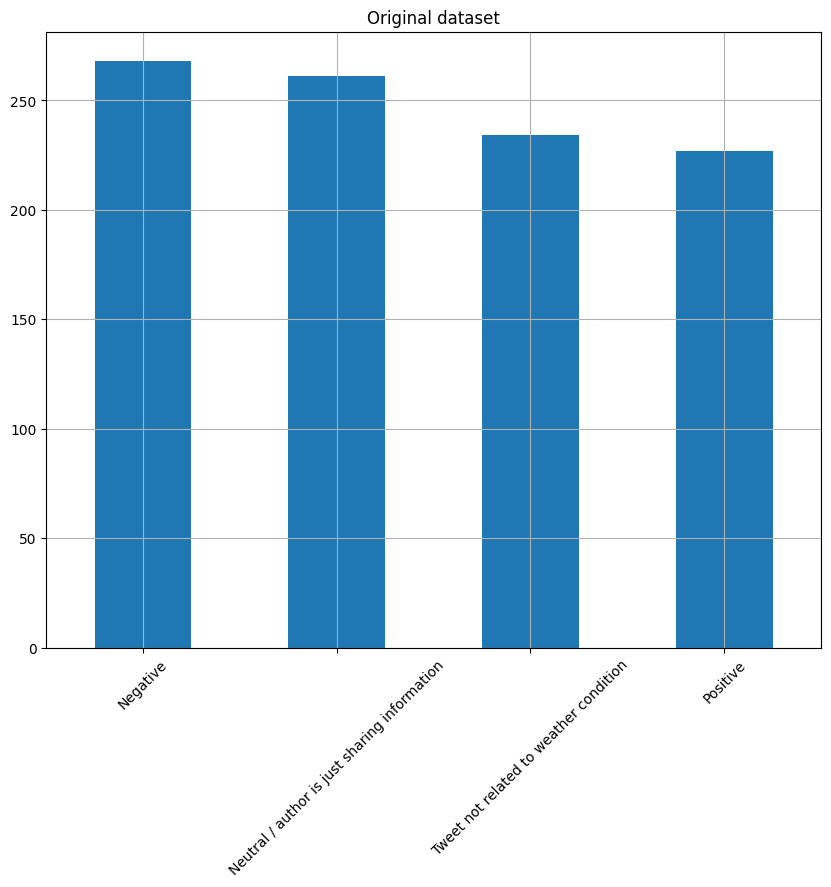

In [153]:
weather_data_without_generated.full_data.sentiment.value_counts().plot(kind='bar', title='Original dataset', figsize=(10, 8), rot=45, grid=True)

<Axes: title={'center': 'Augmented dataset'}>

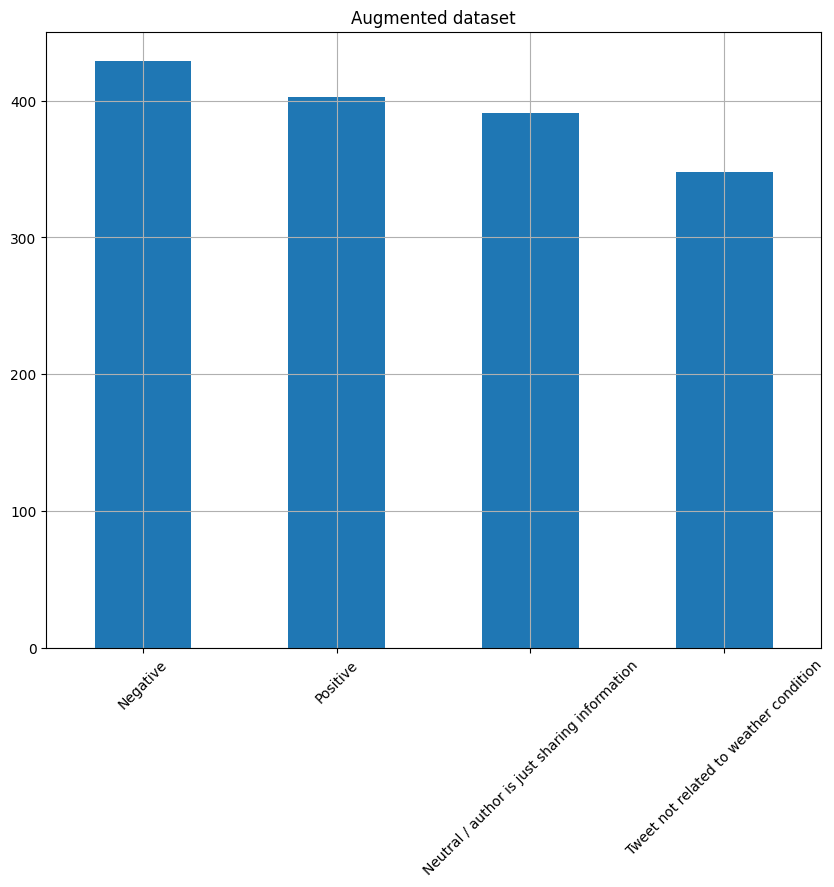

In [154]:
weather_data.full_data.sentiment.value_counts().plot(kind='bar', title='Augmented dataset', figsize=(10, 8), rot=45, grid=True)

As we can see, the original dataset had significantly less positive tweets than the other categories, which can partly explain the low accuracy of predicting positive tweets by our models. In the augmented dataset, the problem is solved, as the number of positive tweets is increased by the generated tweets. This makes the data more balanced and we get a greater vocabulary for our models.

## Confidence analysis

Moving on to the confidence distribution charts, we can see that the data from the original dataset have a distribution close to normal. So, if they are correct, they should be well suited for use in training. However, the augmented dataset has a strong advantage of data with confidence that belongs to **[0.65, 0.9]**. This may explain why the ***Confidence weights*** approach in training was no better than the ***Basic*** approach.

<Axes: title={'center': 'Original dataset'}, ylabel='Frequency'>

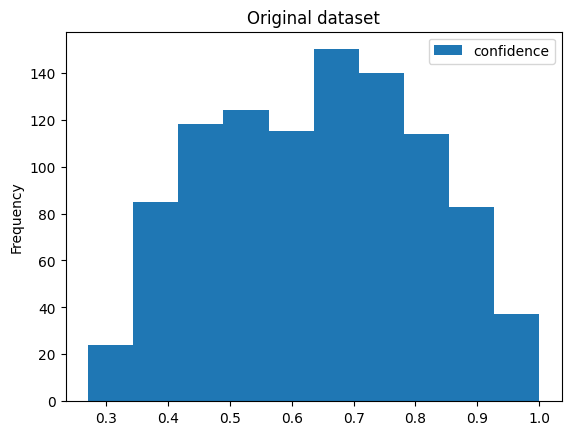

In [155]:
weather_data_without_generated.full_data.plot(kind="hist", title='Original dataset')

<Axes: title={'center': 'Augmented dataset'}, ylabel='Frequency'>

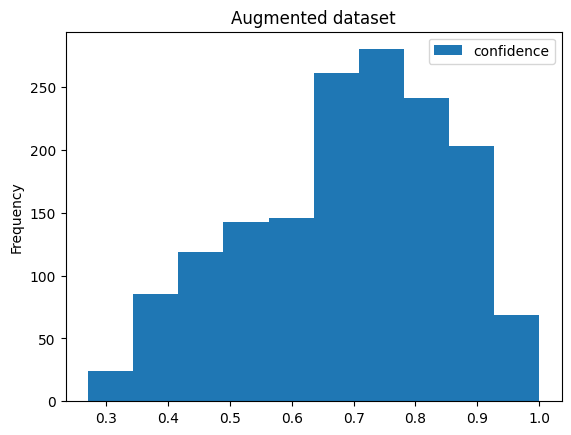

In [156]:
weather_data.full_data.plot(kind="hist", title='Augmented dataset')

The confidence distribution for each sentiment reveals that the augmented dataset has more data with high confidence values than the original dataset. For example, the majority of the **Positive** tweets have confidence values between **[0.8, 0.95]**, while the original dataset has a more uniform distribution. Similarly, the **Negative**, **Neutral**, and **Not related** to weather tweets have more data with confidence values in the ranges of **[0.65, 0.8]**, **[0.6, 0.7]**, and **[0.65, 0.75]**, respectively.

array([[<Axes: title={'center': 'Positive'}>,
        <Axes: title={'center': 'Negative'}>],
       [<Axes: title={'center': 'Neutral'}>,
        <Axes: title={'center': 'Tweet not related to weather'}>]],
      dtype=object)

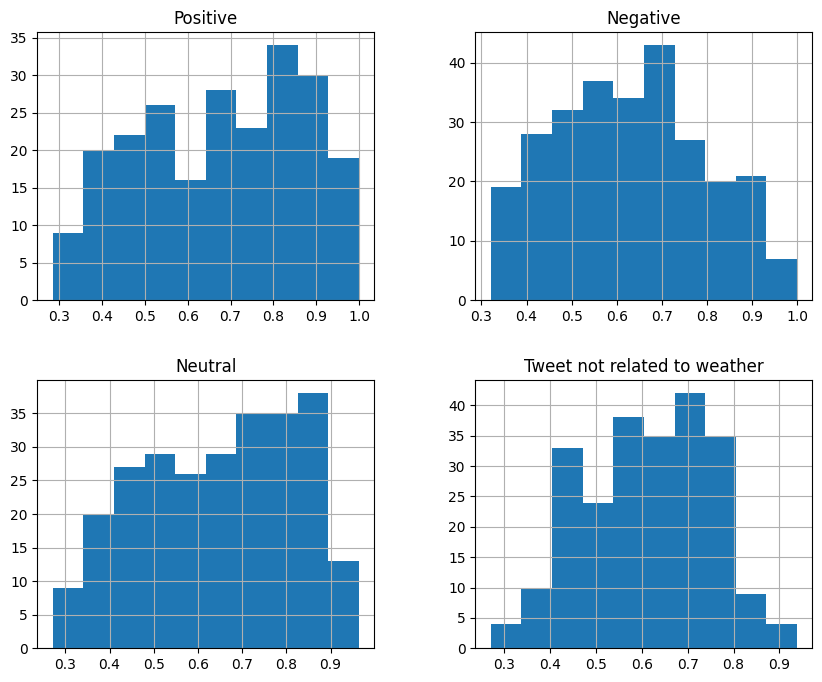

In [157]:
df = weather_data_without_generated.full_data
hist_df = pd.DataFrame({
    'Positive': df[df['sentiment'] == 'Positive'].confidence,
    'Negative': df[df['sentiment'] == 'Negative'].confidence,
    'Neutral': df[df['sentiment'] == 'Neutral / author is just sharing information'].confidence,
    'Tweet not related to weather': df[df['sentiment'] == 'Tweet not related to weather condition'].confidence
})

hist_df.hist(bins=10, figsize=(10, 8))

array([[<Axes: title={'center': 'Positive'}>,
        <Axes: title={'center': 'Negative'}>],
       [<Axes: title={'center': 'Neutral'}>,
        <Axes: title={'center': 'Tweet not related to weather'}>]],
      dtype=object)

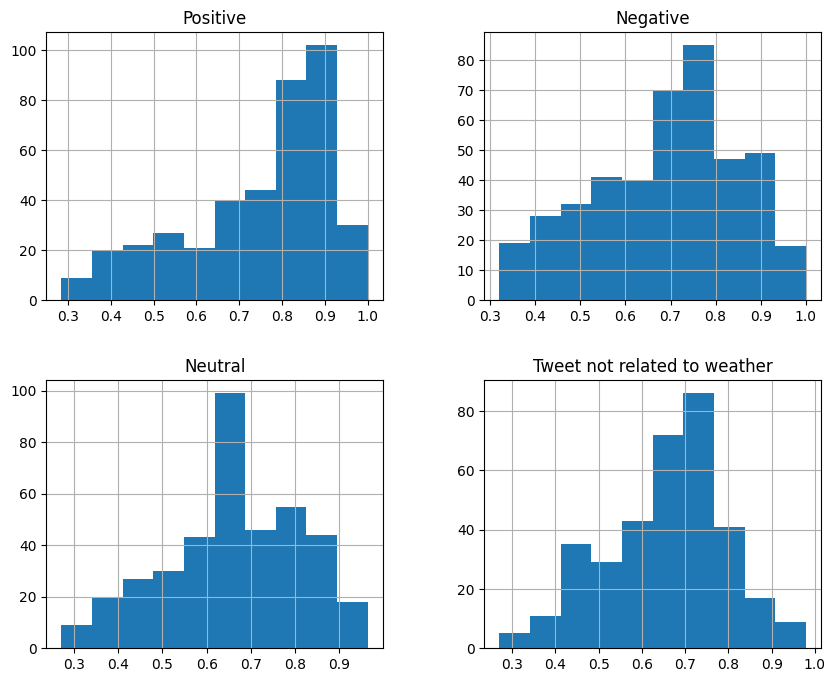

In [158]:
df = weather_data.full_data
hist_df = pd.DataFrame({
    'Positive': df[df['sentiment'] == 'Positive'].confidence,
    'Negative': df[df['sentiment'] == 'Negative'].confidence,
    'Neutral': df[df['sentiment'] == 'Neutral / author is just sharing information'].confidence,
    'Tweet not related to weather': df[df['sentiment'] == 'Tweet not related to weather condition'].confidence
})

hist_df.hist(bins=10, figsize=(10, 8))

In conclusion, we see that using large language models, such as **GPT-4**, can help us generate more text data and increase the vocabulary of our models for sentiment analysis. However, we have also found that the confidence values assigned by the chat bot are not very reliable for predicting the sentiment of the tweets. Therefore, the good practice is to avoide using numerical values describing texts and generated by LLMs.